# Example with a truncated NFW profile

## Import

In [1]:
%load_ext autoreload
%autoreload 2

import pygtfcode as gtf

## Instantiate config object

In [2]:
config = gtf.Config()

This holds all of the parameters that are used to instantiate a State object.  These can be modified before instantiating the State.  Once the State object exists, the config object becomes an attribute of the state.

In [3]:
config

Config(
  io=IOParams(model_no='<not evaluated>', model_dir='<not evaluated>', base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/examples', nlog=100000, drho_prof=0.1, drho_tevol=0.01, overwrite=True, chatter=True),
  grid=GridParams(rmin=0.01, rmax=200.0, ngrid=200),
  init=NFWParams(Mvir=3000000000.0, cvir=20.0, z=0.0),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=1e-12, eps_dt=0.01, eps_du=0.001, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_v2=10)
)

Change to a truncated NFW profile, and modify some precision parameters.

In general, precision parameters are very finicky, and depending on the initial profile, the simulation may fail depending on what you choose.  For the trucated NFW, `eps_du = 1e-4` and `eps_du = 1e-3` have worked for certain choices of the cutoff energy.

In [ ]:
config.init = "truncated_NFW"
config.prec.eps_dt = 1e-3
config.prec.eps_du = 1e-4
config.init.deltaP = 1.0e-5 # Precision parameter for numerical integration of the initial trucated NFW profile

config

Config(
  io=IOParams(model_no='<not evaluated>', model_dir='<not evaluated>', base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/examples', nlog=100000, drho_prof=0.1, drho_tevol=0.01, overwrite=True, chatter=True),
  grid=GridParams(rmin=0.01, rmax=200.0, ngrid=200),
  init=TruncatedNFWParams(Mvir=3000000000.0, cvir=20.0, z=0.0, Zt=0.05938, deltaP=1e-05),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=1e-12, eps_dt=0.001, eps_du=0.001, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_v2=10)
)

The model number is automatically set upon instatiating the state by inspecting the working directory and looking for the next available model number.  This can be overridden by specifying the model_no parameter.  If a simulation has already been run with that model number, files will be overwritten upon instantiation of the state.

In [5]:
config.io.model_no = 0

# Instantiate the state

In [6]:
state = gtf.State(config)

Computing characteristic parameters for simulation...
Generating lookup for rho(phi)...
Computing potential profile for truncated NFW halo...
Integrating Poisson equation outward: r = 116.793421, phi = -0.000002
Setting up radial grid...
Initializing profiles...
Computing Menc: r = 115.625, m = 2.658
Generating lookup for v2 integrand...
Computing v2: r = 112.970, v2 = 0.000
Initial profiles written to disk.
State initialized.
Directory already exists: /Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/examples/Model000
Model information written to model_metadata.txt


Plot the current state (initial state):

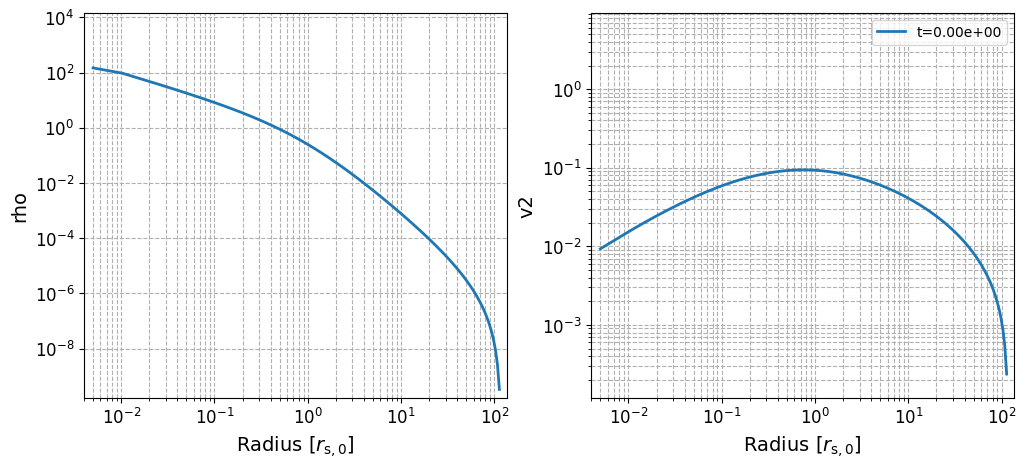

In [10]:
gtf.plot_snapshots(state, grid=True, profiles=['rho', 'v2'])